In [9]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import gca


from matplotlib.pyplot import figure, savefig, show, subplots
from dslabs_functions import plot_bar_chart, get_variable_types, set_chart_labels, define_grid, HEIGHT, plot_multi_scatters_chart

from seaborn import heatmap
from numpy import array, ndarray
from matplotlib.figure import Figure

file_tag = "templates"

import matplotlib.pyplot as plt
import numpy as np

#models = ("gpt3.5-finetuned-small", "gpt3.5-finetuned", "gpt3.5-zeroshot","mistral-finetuned","mistral-zeroshot")
#results = {
#    'BLEU': [],
#    'METEOR': [],
#    'ROUGE': [],
#}

results = {'Accuracy': []}

dic = {}
import os
directory = "./vars"
for file in os.scandir(directory):
    if file.is_file():
        if "txt" in file.name and 'git' not in file.name:
            f = open(file.path, "r")
            line = f.readline()
            bleu = line.split(": ")[2]
            bleu = bleu.split(",")[0]
            line = f.readline()
            meteor = line.split(": ")[2]
            meteor = meteor.split("}")[0]
            line = f.readline()
            rouge = line.split("Lsum': ")[1]
            rouge = rouge.split("}")[0]
            dic[file.name[:-4]] = {'BLEU': float(bleu), 'METEOR': float(meteor), 'ROUGE': float(rouge)}


{'Accuracy': [93, 100]}


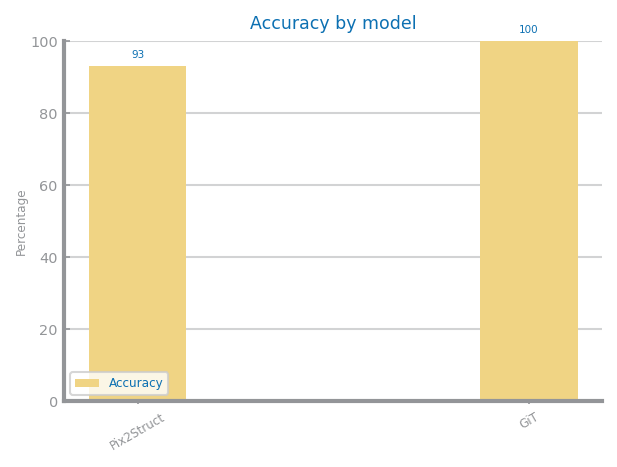

In [10]:
models = [] 
models.append('Pix2Struct')
models.append('GiT')

#for key in dic:
    #models.append(key)
    #results['BLEU'].append(round(dic[key]['BLEU'],2))
    #results['METEOR'].append(round(dic[key]['METEOR'],2))
    #results['ROUGE'].append(round(dic[key]['ROUGE'],2))

results['Accuracy'].append(93)
results['Accuracy'].append(100)
    
print(results)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = '#f0d484')
    ax.bar_label(rects, padding=3,fontsize=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Accuracy by model')
ax.set_xticks(x + width, models)
ax.legend(loc='lower left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 100)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")


savefig(f"../thesisplots/{file_tag}.png", bbox_inches='tight')
show()